In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm, datasets

In [38]:
def make_linear_data(N,delta=0.1):
    
    X = np.zeros((N*N,2))
    delta = 0.1 
    for i in range(N):
        for j in range(N):
            x = np.random.random()
            y = np.random.random()
            while abs(x-y) < delta:
                x = np.random.random()
                y = np.random.random()
            point = np.array([x,y])
            X[10*i+j] = point
            
    Y = X[:, 0] - X[:, 1] < 0
    
    return X,Y

def make_circ_data(N,R1=4,R2=5):
    
    r1 = R1*np.random.random(N)
    r2 = R2 + R2*0.5*np.random.random(N)
    theta = 2 * np.linspace(0,2*np.pi,N) + 2*np.random.random(N)
    x1 = r1*np.cos(theta)
    y1 = r1*np.sin(theta)
    x2 = r2*np.cos(theta)
    y2 = r2*np.sin(theta)
    V1 = list(zip(x1,y1))
    V2 = list(zip(x2,y2))
    Y = np.ones(2*N)
    Y[:N] = 2
    X = np.concatenate((V1,V2),axis=0)
    
    return X,Y

def plot_fit(X,Y,clf):
    plt.figure(figsize=(5,5))
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                    edgecolor='k', s=100)

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['-'], levels=[0])
    
    if isinstance(clf.kernel, str):
        plt.title(clf.kernel)
    else:
        func = clf.kernel
        plt.title(func.__name__)
    plt.show()

# A Geometric Interpretation of Kernel Functions
### Jacob Crabtree

## Linearly Separable Data

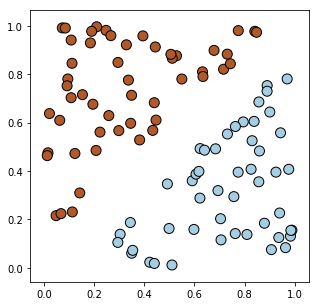

In [39]:
X_lin,Y_lin = make_linear_data(10)
       
plt.figure(figsize=(5,5))
plt.scatter(X_lin[:, 0], X_lin[:, 1], c=Y_lin, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=100)

plt.show()

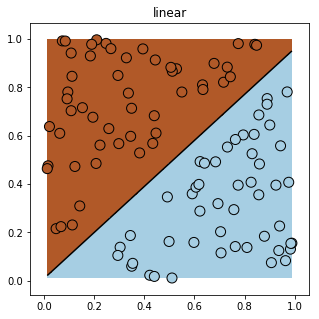

In [40]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_lin,Y_lin)
plot_fit(X_lin,Y_lin,clf)

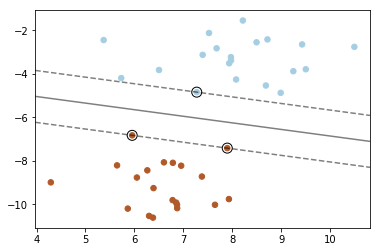

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## Non-Linearly Separable Data

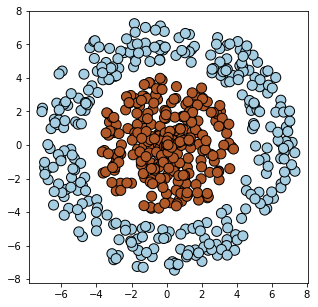

In [42]:
X,Y = make_circ_data(300)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=100)

plt.axis('tight')
plt.show()

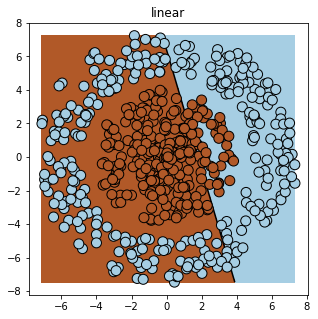

In [43]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X,Y)
plot_fit(X,Y,clf)

## Definition

Let $X$ and $\overline{X}$ be two feature spaces and let $\phi:X \rightarrow \overline{X}$ be a function between them. Then the kernel function, $K_{\phi}: X \times X \rightarrow \mathbb{R}$ is defined by $K_{\phi}(\textbf{v}_2,\textbf{v}_2) = \phi(\textbf{v}_2) \bullet \phi(\textbf{v}_2),$ for all $\textbf{v}_1,\textbf{v}_2 \in X.$

## Defining a feature map

In a low dimensional setting, we can understand a kernel function by seeing how the feature map transforms the data. Let $\textbf{v} = (x,y)$ be some vector in our feature space $X$. The feature map we will consider is defined by $\phi(\textbf{v}) = (x^2,y^2,\sqrt{2}xy).$ Let's see how this feature map transforms our original data.

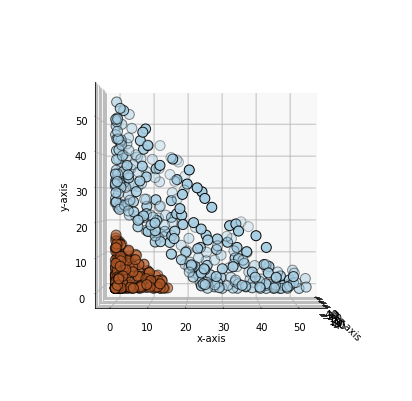

In [50]:
def phi(X):
    x = X[:, 0]**2
    y = X[:, 1]**2
    z = np.sqrt(2)*X[:, 0]*X[:, 1]
    return x,y,z

x,y,z = phi(X)
fig = plt.figure(figsize=(7,7))
ax =fig.add_subplot(111,projection='3d')
ax.scatter(z,x,y, c=Y, zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=100)
ax.view_init(0,0)
ax.set_xlabel('z-axis')
ax.set_ylabel('x-axis')
ax.set_zlabel('y-axis')
plt.show()


## The Polynomial Kernel

Finally let us define our kernel function $K_{\phi}$. Let $\textbf{v}_1 = (x_1,y_1)$ and $\textbf{v}_2 = (x_2,y_2)$ be two feature vectors in our feature space $X$. Then the kernel function is given by $K_{\phi}(\textbf{v}_1,\textbf{v}_2) = (\textbf{v}_1 \bullet \textbf{v}_2)^2.$ In order to verify that $K_{\phi}$ is a kernel function, we need to make sure that $K_{\phi}(\textbf{v}_1,\textbf{v}_2) = \phi(\textbf{v}_1) \bullet \phi(\textbf{v}_2).$ We see that 

$$
\begin{align}
    K_{\phi}(\textbf{v}_1,\textbf{v}_2) &= (\textbf{v}_1 \bullet \textbf{v}_2)^2 \\
    &= (x_1x_2 + y_1y_2)^2 \\
    &= (x_1x_2)^2 + 2x_1x_2y_1y_2 + (y_1y_2)^2
\end{align}
$$

and,


$$
\begin{align}
    \phi(\textbf{v}_1) \bullet \phi(\textbf{v}_2) &= (x_1^2,y_1^2,\sqrt{2}x_1y_1) \bullet (x_2^2,y_2^2,\sqrt{2}x_2y_2)\\
    &= (x_1x_2)^2 + (y_1y_2)^2 + 2x_1x_2y_1y_2 
\end{align}
$$


which confirms that the kernel function $K_{\phi}(\textbf{v}_1,\textbf{v}_2)$ and the dot product $\phi(\textbf{v}_1) \bullet \phi(\textbf{v}_2)$ are in fact the same expression.

## A Non-Linear Decision Boundary

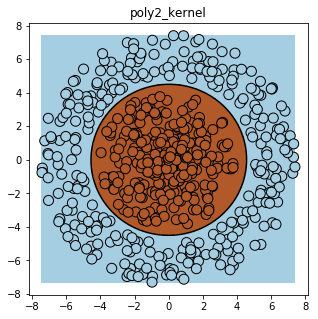

In [385]:
def poly2_kernel(X,Y):
    return np.dot(X,Y.T)**2

clf = svm.SVC(kernel=poly2_kernel)
clf.fit(X,Y)
plot_fit(X,Y,clf)

## Comparison to Standard Kernel Functions

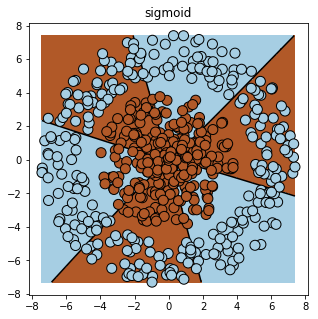

In [386]:
clf = svm.SVC(kernel = 'sigmoid')
clf.fit(X,Y)
plot_fit(X,Y,clf)

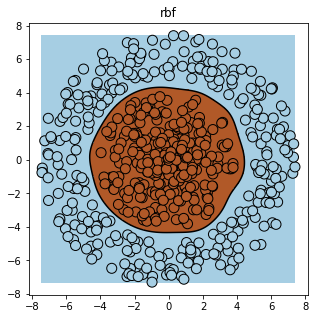

In [387]:
clf = svm.SVC(kernel='rbf')
clf.fit(X,Y)
plot_fit(X,Y,clf)